In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
canada = pd.read_csv('../Resources/CanSIPS_IC4_FULL_LDC.csv')
canada['LDC_SST_CanSIPS_IC4'] = canada['LDC_SST_CanSIPS_IC4'] - 273.15
canada['LDC_SST_CanSIPS_IC4_ONETWO'] = canada['LDC_SST_CanSIPS_IC4_ONETWO'] - 273.15
canada['LDC_SST_CanSIPS_IC4_THREE'] = canada['LDC_SST_CanSIPS_IC4_THREE'] - 273.15
canada['LDC_SST_CanSIPS_IC4_FOUR'] = canada['LDC_SST_CanSIPS_IC4_FOUR'] - 273.15
canada['MON'] = pd.to_datetime(canada['MON'], format = '%H%M %d %b %Y')
canada['START'] = canada['MON'].dt.month
canada['TARGET'] = ((canada['START'] + canada['L']).astype(int))%12
canada['TARGET'] = canada['TARGET'].apply(lambda x: 12 if x == 0 else x)

#import model LDC data for canadian sisters
canesm = pd.read_csv('../Resources/CanESM5_FULL_LDC.csv')
canesm['LDC_SST_CanESM5'] = canesm['LDC_SST_CanESM5'] - 273.15
canesm['LDC_SST_CanESM5_ONETWO'] = canesm['LDC_SST_CanESM5_ONETWO'] - 273.15
canesm['LDC_SST_CanESM5_THREE'] = canesm['LDC_SST_CanESM5_THREE'] - 273.15
canesm['LDC_SST_CanESM5_FOUR'] = canesm['LDC_SST_CanESM5_FOUR'] - 273.15
nemo = pd.read_csv('../Resources/GEM52_NEMO_FULL_LDC.csv')
nemo['LDC_SST_GEM52_NEMO'] = nemo['LDC_SST_GEM52_NEMO'] - 273.15
nemo['LDC_SST_GEM52_NEMO_ONETWO'] = nemo['LDC_SST_GEM52_NEMO_ONETWO'] - 273.15
nemo['LDC_SST_GEM52_NEMO_THREE'] = nemo['LDC_SST_GEM52_NEMO_THREE'] - 273.15
nemo['LDC_SST_GEM52_NEMO_FOUR'] = nemo['LDC_SST_GEM52_NEMO_FOUR'] - 273.15

# Calculate the mean grouped by 'L' and 'START' - Nino3.4
canada_mean = canada.groupby(['L', 'START'])['LDC_SST_CanSIPS_IC4'].mean().reset_index()
canada_mean.rename(columns={'LDC_SST_CanSIPS_IC4': 'MEAN_SST_CanSIPS_IC4'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3.4
canada_var = canada.groupby(['L', 'START'])['LDC_SST_CanSIPS_IC4'].var().reset_index()
canada_var.rename(columns={'LDC_SST_CanSIPS_IC4': 'VAR_SST_CanSIPS_IC4'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino1+2
canada_mean_onetwo = canada.groupby(['L', 'START'])['LDC_SST_CanSIPS_IC4_ONETWO'].mean().reset_index()
canada_mean_onetwo.rename(columns={'LDC_SST_CanSIPS_IC4_ONETWO': 'MEAN_SST_CanSIPS_IC4_ONETWO'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino1+2
canada_var_onetwo = canada.groupby(['L', 'START'])['LDC_SST_CanSIPS_IC4_ONETWO'].var().reset_index()
canada_var_onetwo.rename(columns={'LDC_SST_CanSIPS_IC4_ONETWO': 'VAR_SST_CanSIPS_IC4_ONETWO'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino3
canada_mean_three = canada.groupby(['L', 'START'])['LDC_SST_CanSIPS_IC4_THREE'].mean().reset_index()
canada_mean_three.rename(columns={'LDC_SST_CanSIPS_IC4_THREE': 'MEAN_SST_CanSIPS_IC4_THREE'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3
canada_var_three = canada.groupby(['L', 'START'])['LDC_SST_CanSIPS_IC4_THREE'].var().reset_index()
canada_var_three.rename(columns={'LDC_SST_CanSIPS_IC4_THREE': 'VAR_SST_CanSIPS_IC4_THREE'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino4
canada_mean_four = canada.groupby(['L', 'START'])['LDC_SST_CanSIPS_IC4_FOUR'].mean().reset_index()
canada_mean_four.rename(columns={'LDC_SST_CanSIPS_IC4_FOUR': 'MEAN_SST_CanSIPS_IC4_FOUR'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino4
canada_var_four = canada.groupby(['L', 'START'])['LDC_SST_CanSIPS_IC4_FOUR'].var().reset_index()
canada_var_four.rename(columns={'LDC_SST_CanSIPS_IC4_FOUR': 'VAR_SST_CanSIPS_IC4_FOUR'}, inplace=True)

# Merge the mean and variance DataFrames
dfs = [canada_mean, canada_var,canada_mean_onetwo, canada_var_onetwo, canada_mean_three, canada_var_three, canada_mean_four, canada_var_four]
canada_stat = reduce(lambda left, right: pd.merge(left, right, on=['L', 'START']), dfs)

month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canada_stat['TARGET'] = ((canada_stat['START'] + canada_stat['L']).astype(int))%12
canada_stat['TARGET'] = canada_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
canada_stat['SZN'] = canada_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_CanSIPS_IC4','VAR_SST_CanSIPS_IC4',
             'MEAN_SST_CanSIPS_IC4_ONETWO','VAR_SST_CanSIPS_IC4_ONETWO',
             'MEAN_SST_CanSIPS_IC4_THREE','VAR_SST_CanSIPS_IC4_THREE',
             'MEAN_SST_CanSIPS_IC4_FOUR','VAR_SST_CanSIPS_IC4_FOUR' ]
canada_stat = canada_stat[new_order]

canada_stat.to_csv('../Resources/canada_stat.csv', index=False)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
canada_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_canada = canada_stat[canada_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canada.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_canada.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_canada = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    canada_stat_dfs[f'lead{lead}'] = filtered_canada
    
canada_stat_dfs['lead5']

,L,START,TARGET,SZN,MEAN_SST_CanSIPS_IC4,VAR_SST_CanSIPS_IC4,MEAN_SST_CanSIPS_IC4_ONETWO,VAR_SST_CanSIPS_IC4_ONETWO,MEAN_SST_CanSIPS_IC4_THREE,VAR_SST_CanSIPS_IC4_THREE,MEAN_SST_CanSIPS_IC4_FOUR,VAR_SST_CanSIPS_IC4_FOUR
0,5.5,9,2,JFM,26.107243,0.796373,26.340177,0.206064,25.951177,0.619892,27.565213,0.509390
1,5.5,10,3,FMA,26.370477,0.647178,26.658137,0.173912,26.327660,0.500256,27.620623,0.415052
2,5.5,11,4,MAM,26.584007,0.545651,26.059930,0.165810,26.327090,0.401738,27.782077,0.375573
3,5.5,12,5,AMJ,26.661627,0.419697,24.944857,0.232056,25.990697,0.327871,27.953860,0.314040
4,5.5,1,6,MJJ,26.477403,0.224152,23.820070,0.189431,25.392213,0.216614,27.984997,0.185434
5,5.5,2,7,JJA,26.130453,0.260566,23.142713,0.228555,24.865007,0.263743,27.878953,0.186722
6,5.5,3,8,JAS,25.888703,0.289542,22.810687,0.279464,24.620110,0.274736,27.802387,0.215928
7,5.5,4,9,ASO,25.799197,0.322144,22.840577,0.280667,24.615043,0.275700,27.791367,0.267878
8,5.5,5,10,SON,25.884373,0.513403,23.286717,0.311182,24.822140,0.437577,27.858057,0.428980
9,5.5,6,11,OND,25.927273,0.722308,23.920773,0.312339,25.015390,0.603501,27.847910,0.583879


In [2]:
obs = pd.read_csv('../Resources/monthly_obs.csv')

#import gfdl data
gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
gfdl_stat_dfs = {}
# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_stat[gfdl_stat['L'] == i].copy()
    lead = int(i)
    j=1; 
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_stat_dfs[f'lead{lead}'] = filtered_gfdl

#import cola data
cola_stat = pd.read_csv('../Resources/cola_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
cola_stat_dfs = {}
for i in lead_times:
    filtered_cola = cola_stat[cola_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    while j < lead: 
        bottom_row = filtered_cola.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_cola.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_cola = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    cola_stat_dfs[f'lead{lead}'] = filtered_cola


#import nasa data
nasa_stat = pd.read_csv('../Resources/nasa_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
nasa_stat_dfs = {}
for i in lead_times:
    filtered_nasa = nasa_stat[nasa_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nasa.iloc[-1:]
        rest_of_df = filtered_nasa.iloc[:-1]
        filtered_nasa = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    nasa_stat_dfs[f'lead{lead}'] = filtered_nasa

#import ncep data
ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
ncep_stat_dfs = {}
for i in lead_times:
    filtered_ncep = ncep_stat[ncep_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_ncep.iloc[-1:]
        rest_of_df = filtered_ncep.iloc[:-1]
        filtered_ncep = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    ncep_stat_dfs[f'lead{lead}'] = filtered_ncep

ncep_stat_dfs['lead5']

,L,START,TARGET,SZN,MEAN_SST_NCEP_CFSv2,VAR_SST_NCEP_CFSv2,MEAN_SST_NCEP_CFSv2_ONETWO,VAR_SST_NCEP_CFSv2_ONETWO,MEAN_SST_NCEP_CFSv2_THREE,VAR_SST_NCEP_CFSv2_THREE,MEAN_SST_NCEP_CFSv2_FOUR,VAR_SST_NCEP_CFSv2_FOUR
0,5.5,9,2,JFM,27.199325,1.068290,27.336774,0.586820,26.738004,1.094640,28.497131,0.293424
1,5.5,10,3,FMA,27.533594,0.657218,27.990228,0.472788,27.427905,0.804179,28.505448,0.189026
2,5.5,11,4,MAM,27.892349,0.474784,27.646686,0.440835,27.804941,0.655022,28.658608,0.208586
3,5.5,12,5,AMJ,28.105255,0.324743,26.369262,0.412991,27.599892,0.472334,28.934888,0.140423
4,5.5,1,6,MJJ,27.940135,0.209304,24.999906,0.317308,26.980278,0.260261,29.045360,0.118121
5,5.5,2,7,JJA,27.293351,0.361909,24.214152,0.548203,26.203054,0.432649,28.757834,0.184627
6,5.5,3,8,JAS,26.961880,0.709198,23.974510,0.769429,25.854233,0.810461,28.566655,0.313012
7,5.5,4,9,ASO,26.581690,0.926409,23.615354,0.672907,25.465695,0.963668,28.368480,0.455171
8,5.5,5,10,SON,25.923397,1.377004,23.324580,0.496355,24.820649,1.216923,27.906216,0.768647
9,5.5,6,11,OND,25.731068,1.700736,23.679172,0.447007,24.616294,1.416931,27.813998,0.939403


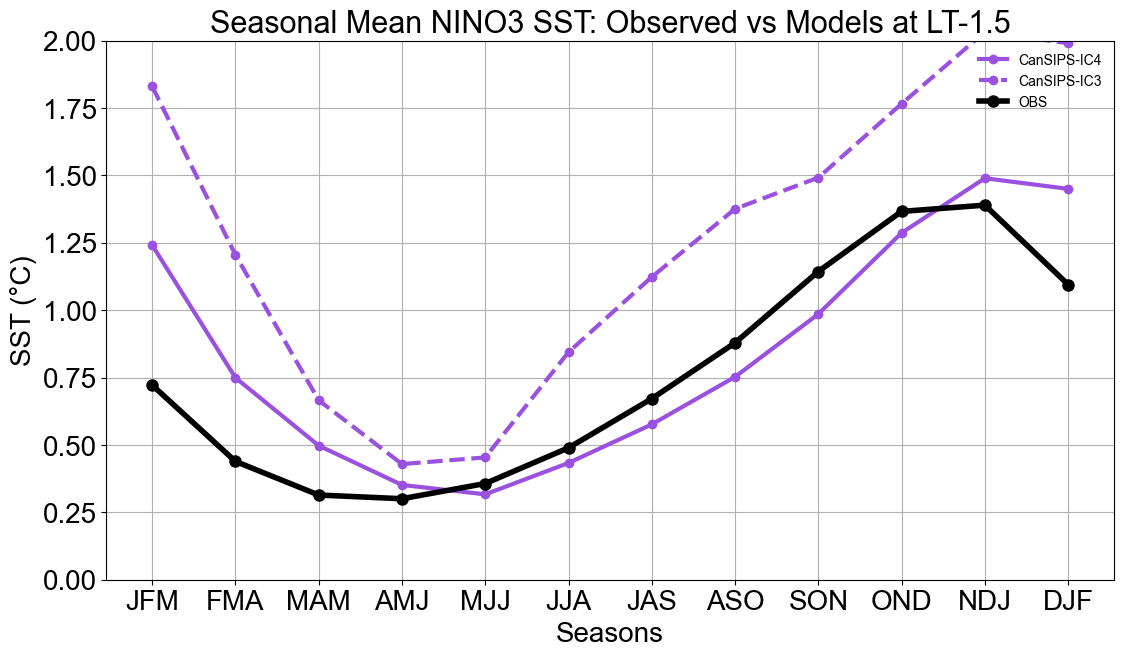

In [3]:
#import old canada data
canada_old_stat = pd.read_csv('../Resources/canada_old_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
canada_old_stat_dfs = {}
for i in lead_times:
    filtered_canada_old = canada_old_stat[canada_old_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canada_old.iloc[-1:]
        rest_of_df = filtered_canada_old.iloc[:-1]
        filtered_canada_old = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    canada_old_stat_dfs[f'lead{lead}'] = filtered_canada_old


def canadaCompare(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC4'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(canada_old_stat_dfs[f'lead{lead}']['SZN'], canada_old_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC3'], marker='o',markersize=6, linewidth=3,linestyle='--', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(obs['SZN'], obs[f'VARIANCE{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=2)
    plt.savefig(f'../Plots/Mean/cansips_compare_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

canadaCompare('3', 2)



In [4]:
#obtain nemo data
nemo = pd.read_csv('../Resources/GEM52_NEMO_FULL_LDC.csv')
nemo['LDC_SST_GEM52_NEMO'] = nemo['LDC_SST_GEM52_NEMO'] - 273.15
nemo['LDC_SST_GEM52_NEMO_ONETWO'] = nemo['LDC_SST_GEM52_NEMO_ONETWO'] - 273.15
nemo['LDC_SST_GEM52_NEMO_THREE'] = nemo['LDC_SST_GEM52_NEMO_THREE'] - 273.15
nemo['LDC_SST_GEM52_NEMO_FOUR'] = nemo['LDC_SST_GEM52_NEMO_FOUR'] - 273.15


#process nemo data
nemo['MON'] = pd.to_datetime(nemo['MON'], format = '%H%M %d %b %Y')
nemo['START'] = nemo['MON'].dt.month
nemo['TARGET'] = ((nemo['START'] + nemo['L']).astype(int))%12
nemo['TARGET'] = nemo['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START' - Nino3.4
nemo_mean = nemo.groupby(['L', 'START'])['LDC_SST_GEM52_NEMO'].mean().reset_index()
nemo_mean.rename(columns={'LDC_SST_GEM52_NEMO': 'MEAN_SST_GEM52_NEMO'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3.4
nemo_var = nemo.groupby(['L', 'START'])['LDC_SST_GEM52_NEMO'].var().reset_index()
nemo_var.rename(columns={'LDC_SST_GEM52_NEMO': 'VAR_SST_GEM52_NEMO'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino1+2
nemo_mean_onetwo = nemo.groupby(['L', 'START'])['LDC_SST_GEM52_NEMO_ONETWO'].mean().reset_index()
nemo_mean_onetwo.rename(columns={'LDC_SST_GEM52_NEMO_ONETWO': 'MEAN_SST_GEM52_NEMO_ONETWO'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino1+2
nemo_var_onetwo = nemo.groupby(['L', 'START'])['LDC_SST_GEM52_NEMO_ONETWO'].var().reset_index()
nemo_var_onetwo.rename(columns={'LDC_SST_GEM52_NEMO_ONETWO': 'VAR_SST_GEM52_NEMO_ONETWO'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino3
nemo_mean_three = nemo.groupby(['L', 'START'])['LDC_SST_GEM52_NEMO_THREE'].mean().reset_index()
nemo_mean_three.rename(columns={'LDC_SST_GEM52_NEMO_THREE': 'MEAN_SST_GEM52_NEMO_THREE'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3
nemo_var_three = nemo.groupby(['L', 'START'])['LDC_SST_GEM52_NEMO_THREE'].var().reset_index()
nemo_var_three.rename(columns={'LDC_SST_GEM52_NEMO_THREE': 'VAR_SST_GEM52_NEMO_THREE'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino4
nemo_mean_four = nemo.groupby(['L', 'START'])['LDC_SST_GEM52_NEMO_FOUR'].mean().reset_index()
nemo_mean_four.rename(columns={'LDC_SST_GEM52_NEMO_FOUR': 'MEAN_SST_GEM52_NEMO_FOUR'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino4
nemo_var_four = nemo.groupby(['L', 'START'])['LDC_SST_GEM52_NEMO_FOUR'].var().reset_index()
nemo_var_four.rename(columns={'LDC_SST_GEM52_NEMO_FOUR': 'VAR_SST_GEM52_NEMO_FOUR'}, inplace=True)

# Merge the mean and variance DataFrames
dfs = [nemo_mean, nemo_var,nemo_mean_onetwo, nemo_var_onetwo, nemo_mean_three, nemo_var_three, nemo_mean_four, nemo_var_four]
nemo_stat = reduce(lambda left, right: pd.merge(left, right, on=['L', 'START']), dfs)

month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nemo_stat['TARGET'] = ((nemo_stat['START'] + nemo_stat['L']).astype(int))%12
nemo_stat['TARGET'] = nemo_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
nemo_stat['SZN'] = nemo_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_GEM52_NEMO','VAR_SST_GEM52_NEMO',
             'MEAN_SST_GEM52_NEMO_ONETWO','VAR_SST_GEM52_NEMO_ONETWO',
             'MEAN_SST_GEM52_NEMO_THREE','VAR_SST_GEM52_NEMO_THREE',
             'MEAN_SST_GEM52_NEMO_FOUR','VAR_SST_GEM52_NEMO_FOUR' ]
nemo_stat = nemo_stat[new_order]

nemo_stat.to_csv('../Resources/nemo_stat.csv', index=False)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
nemo_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nemo = nemo_stat[nemo_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nemo.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nemo.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nemo = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nemo_stat_dfs[f'lead{lead}'] = filtered_nemo
    
nemo_stat_dfs['lead5']



,L,START,TARGET,SZN,MEAN_SST_GEM52_NEMO,VAR_SST_GEM52_NEMO,MEAN_SST_GEM52_NEMO_ONETWO,VAR_SST_GEM52_NEMO_ONETWO,MEAN_SST_GEM52_NEMO_THREE,VAR_SST_GEM52_NEMO_THREE,MEAN_SST_GEM52_NEMO_FOUR,VAR_SST_GEM52_NEMO_FOUR
0,5.5,9,2,JFM,25.388253,1.022669,25.779227,0.239586,26.559967,0.549446,26.842717,0.792172
1,5.5,10,3,FMA,25.463767,0.873490,25.973363,0.230039,27.150900,0.400765,26.760600,0.647544
2,5.5,11,4,MAM,25.523283,0.706602,25.181487,0.295718,27.317320,0.317463,26.809033,0.559630
3,5.5,12,5,AMJ,25.553497,0.588007,23.912780,0.505390,27.050060,0.236162,26.936443,0.495673
4,5.5,1,6,MJJ,25.327370,0.391635,22.754917,0.476616,26.504973,0.183474,26.941207,0.305833
5,5.5,2,7,JJA,24.878940,0.505317,22.159617,0.471255,26.025580,0.174731,26.751350,0.324613
6,5.5,3,8,JAS,24.593267,0.622704,21.926777,0.489587,25.744327,0.161861,26.607027,0.415122
7,5.5,4,9,ASO,24.579540,0.661915,22.063600,0.399468,25.599160,0.154284,26.572470,0.495313
8,5.5,5,10,SON,24.832417,0.873358,22.620420,0.420027,25.638283,0.288844,26.727377,0.694021
9,5.5,6,11,OND,25.008447,1.112343,23.323410,0.443035,25.710157,0.421080,26.866107,0.926492


In [5]:
#obtain canesm data
canesm = pd.read_csv('../Resources/CanESM5_FULL_LDC.csv')
canesm['LDC_SST_CanESM5'] = canesm['LDC_SST_CanESM5'] - 273.15
canesm['LDC_SST_CanESM5_ONETWO'] = canesm['LDC_SST_CanESM5_ONETWO'] - 273.15
canesm['LDC_SST_CanESM5_THREE'] = canesm['LDC_SST_CanESM5_THREE'] - 273.15
canesm['LDC_SST_CanESM5_FOUR'] = canesm['LDC_SST_CanESM5_FOUR'] - 273.15


#process canesm data
canesm['MON'] = pd.to_datetime(canesm['MON'], format = '%H%M %d %b %Y')
canesm['START'] = canesm['MON'].dt.month
canesm['TARGET'] = ((canesm['START'] + canesm['L']).astype(int))%12
canesm['TARGET'] = canesm['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START' - Nino3.4
canesm_mean = canesm.groupby(['L', 'START'])['LDC_SST_CanESM5'].mean().reset_index()
canesm_mean.rename(columns={'LDC_SST_CanESM5': 'MEAN_SST_CanESM5'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3.4
canesm_var = canesm.groupby(['L', 'START'])['LDC_SST_CanESM5'].var().reset_index()
canesm_var.rename(columns={'LDC_SST_CanESM5': 'VAR_SST_CanESM5'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino1+2
canesm_mean_onetwo = canesm.groupby(['L', 'START'])['LDC_SST_CanESM5_ONETWO'].mean().reset_index()
canesm_mean_onetwo.rename(columns={'LDC_SST_CanESM5_ONETWO': 'MEAN_SST_CanESM5_ONETWO'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino1+2
canesm_var_onetwo = canesm.groupby(['L', 'START'])['LDC_SST_CanESM5_ONETWO'].var().reset_index()
canesm_var_onetwo.rename(columns={'LDC_SST_CanESM5_ONETWO': 'VAR_SST_CanESM5_ONETWO'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino3
canesm_mean_three = canesm.groupby(['L', 'START'])['LDC_SST_CanESM5_THREE'].mean().reset_index()
canesm_mean_three.rename(columns={'LDC_SST_CanESM5_THREE': 'MEAN_SST_CanESM5_THREE'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3
canesm_var_three = canesm.groupby(['L', 'START'])['LDC_SST_CanESM5_THREE'].var().reset_index()
canesm_var_three.rename(columns={'LDC_SST_CanESM5_THREE': 'VAR_SST_CanESM5_THREE'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino4
canesm_mean_four = canesm.groupby(['L', 'START'])['LDC_SST_CanESM5_FOUR'].mean().reset_index()
canesm_mean_four.rename(columns={'LDC_SST_CanESM5_FOUR': 'MEAN_SST_CanESM5_FOUR'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino4
canesm_var_four = canesm.groupby(['L', 'START'])['LDC_SST_CanESM5_FOUR'].var().reset_index()
canesm_var_four.rename(columns={'LDC_SST_CanESM5_FOUR': 'VAR_SST_CanESM5_FOUR'}, inplace=True)

# Merge the mean and variance DataFrames
dfs = [canesm_mean, canesm_var,canesm_mean_onetwo, canesm_var_onetwo, canesm_mean_three, canesm_var_three, canesm_mean_four, canesm_var_four]
canesm_stat = reduce(lambda left, right: pd.merge(left, right, on=['L', 'START']), dfs)

month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canesm_stat['TARGET'] = ((canesm_stat['START'] + canesm_stat['L']).astype(int))%12
canesm_stat['TARGET'] = canesm_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
canesm_stat['SZN'] = canesm_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_CanESM5','VAR_SST_CanESM5',
             'MEAN_SST_CanESM5_ONETWO','VAR_SST_CanESM5_ONETWO',
             'MEAN_SST_CanESM5_THREE','VAR_SST_CanESM5_THREE',
             'MEAN_SST_CanESM5_FOUR','VAR_SST_CanESM5_FOUR' ]
canesm_stat = canesm_stat[new_order]

canesm_stat.to_csv('../Resources/canesm_stat.csv', index=False)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
canesm_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_canesm = canesm_stat[canesm_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canesm.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_canesm.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_canesm = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    canesm_stat_dfs[f'lead{lead}'] = filtered_canesm
    
canesm_stat_dfs['lead5']



,L,START,TARGET,SZN,MEAN_SST_CanESM5,VAR_SST_CanESM5,MEAN_SST_CanESM5_ONETWO,VAR_SST_CanESM5_ONETWO,MEAN_SST_CanESM5_THREE,VAR_SST_CanESM5_THREE,MEAN_SST_CanESM5_FOUR,VAR_SST_CanESM5_FOUR
0,5.5,9,2,JFM,26.826223,0.650609,26.901147,0.198027,26.559967,0.549446,28.287703,0.316942
1,5.5,10,3,FMA,27.277163,0.499680,27.342917,0.153199,27.150900,0.400765,28.480670,0.264601
2,5.5,11,4,MAM,27.644730,0.455451,26.938360,0.123494,27.317320,0.317463,28.755157,0.255670
3,5.5,12,5,AMJ,27.769767,0.340350,25.976903,0.165943,27.050060,0.236162,28.971290,0.212034
4,5.5,1,6,MJJ,27.627433,0.181380,24.885207,0.237342,26.504973,0.183474,29.028767,0.135303
5,5.5,2,7,JJA,27.381950,0.147991,24.125810,0.273402,26.025580,0.174731,29.006560,0.108292
6,5.5,3,8,JAS,27.184157,0.129895,23.694587,0.292385,25.744327,0.161861,28.997707,0.106912
7,5.5,4,9,ASO,27.018853,0.153387,23.617520,0.247692,25.599160,0.154284,29.010247,0.136823
8,5.5,5,10,SON,26.936343,0.300338,23.953027,0.277004,25.638283,0.288844,28.988740,0.262287
9,5.5,6,11,OND,26.846120,0.442297,24.518143,0.262564,25.710157,0.421080,28.829713,0.337649


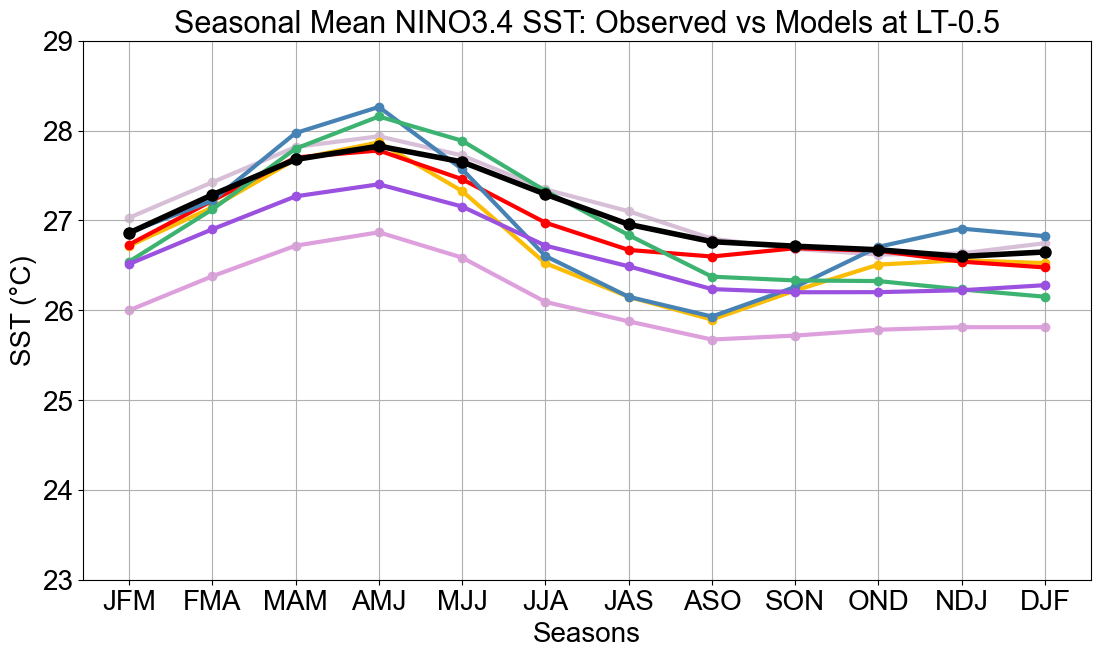

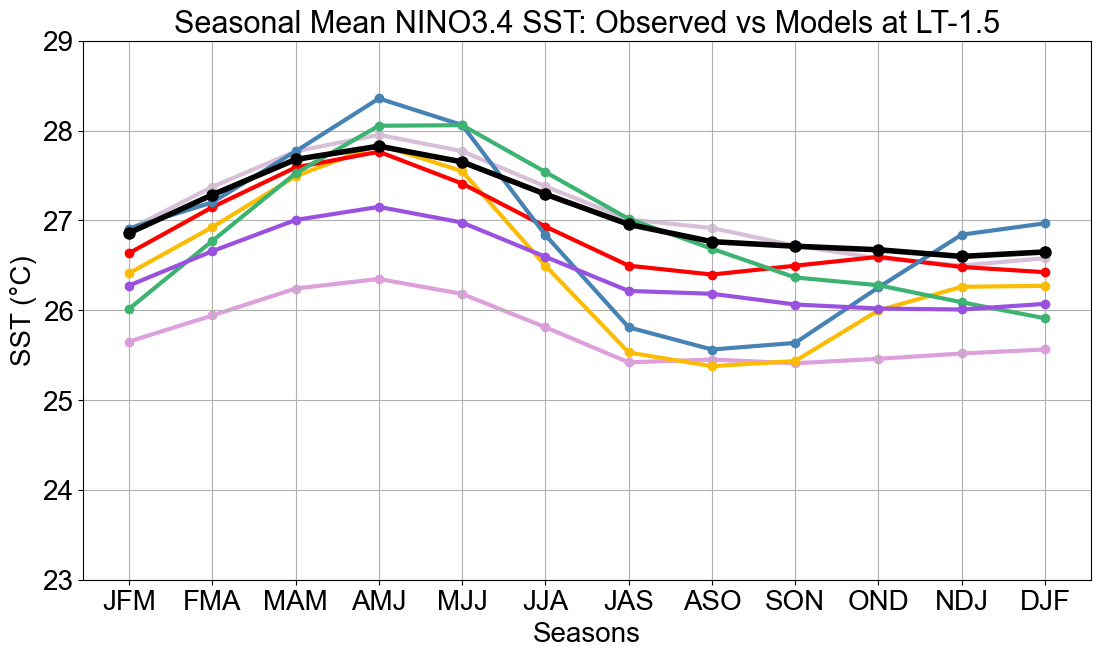

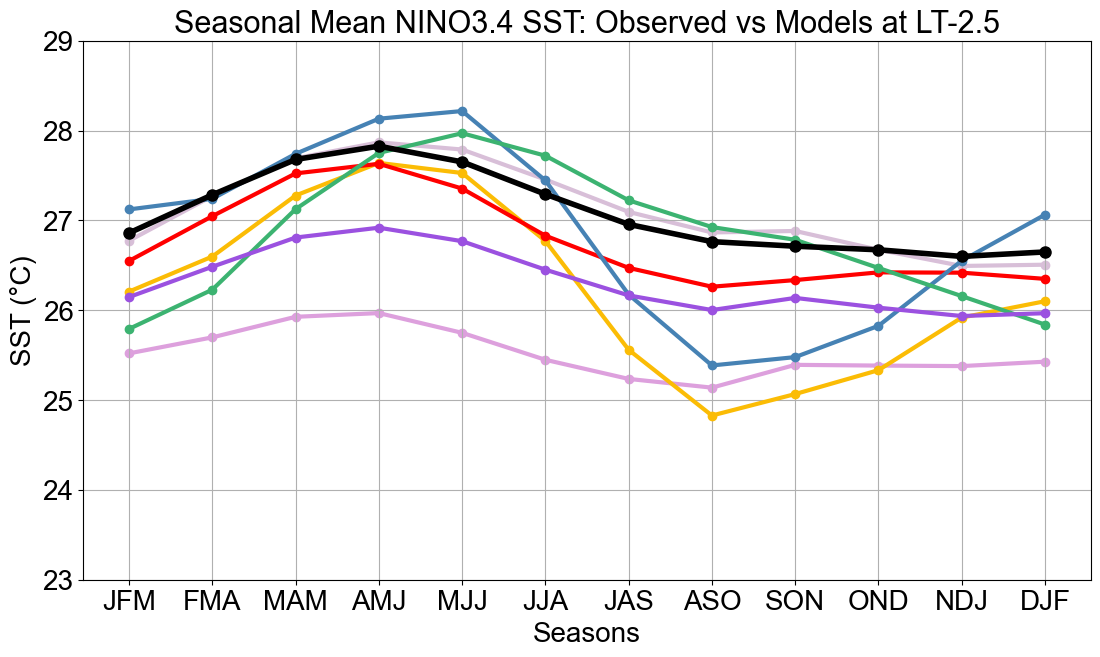

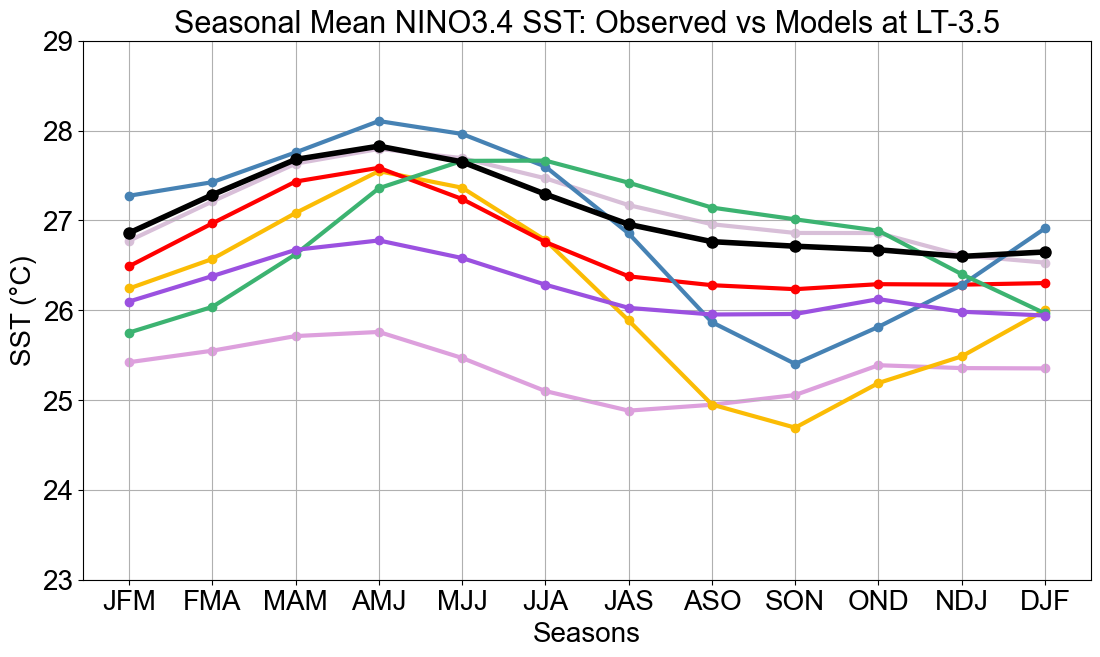

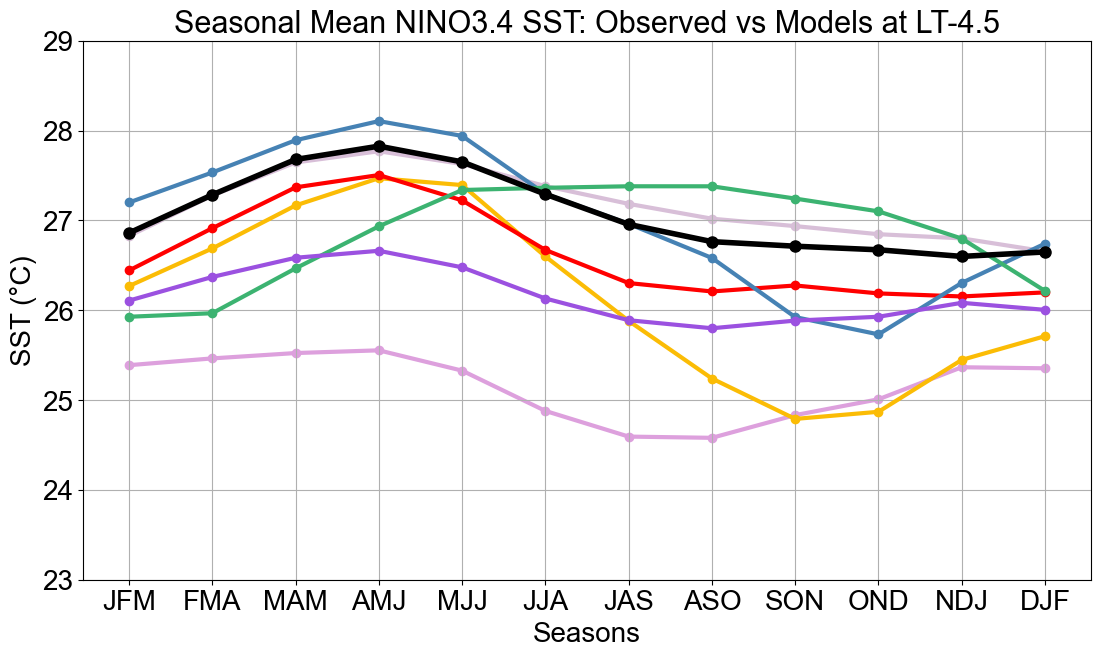

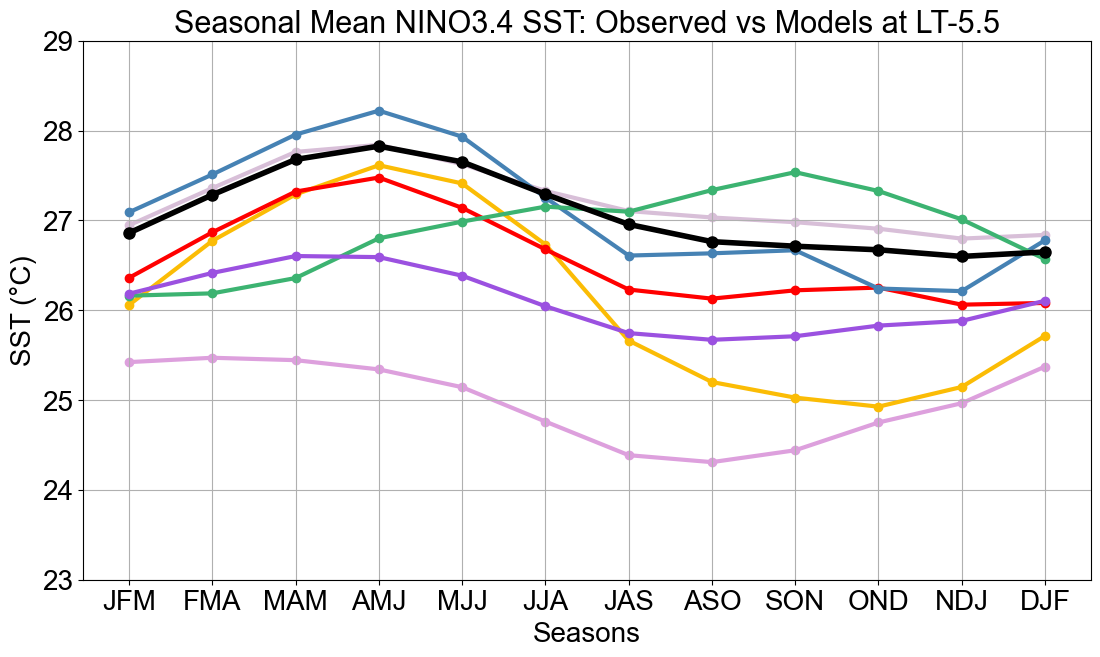

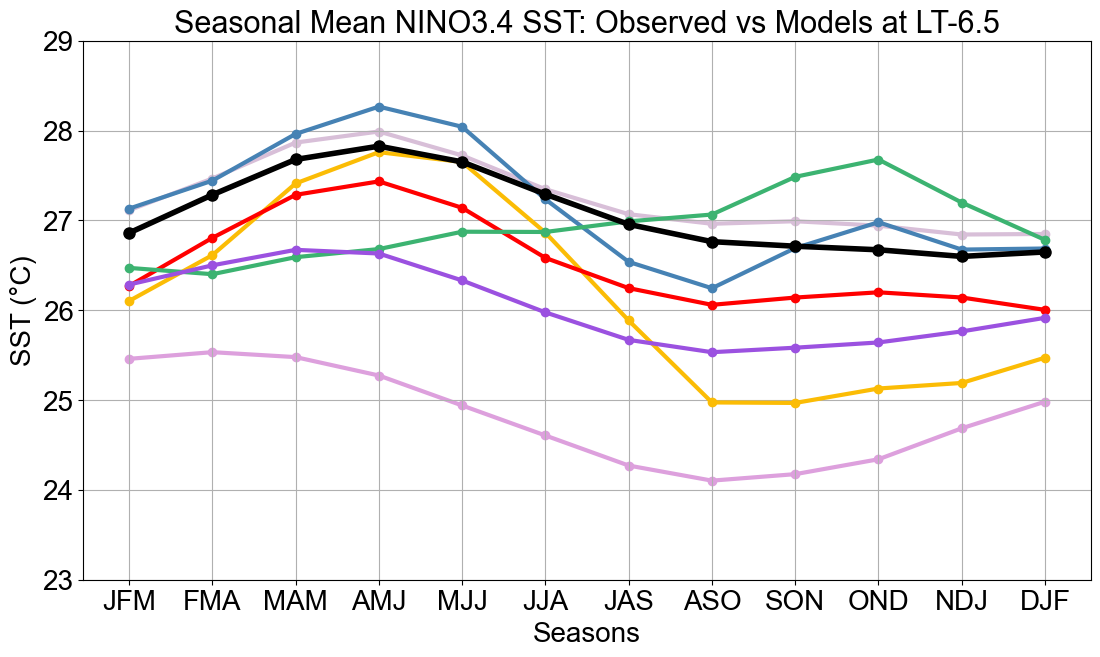

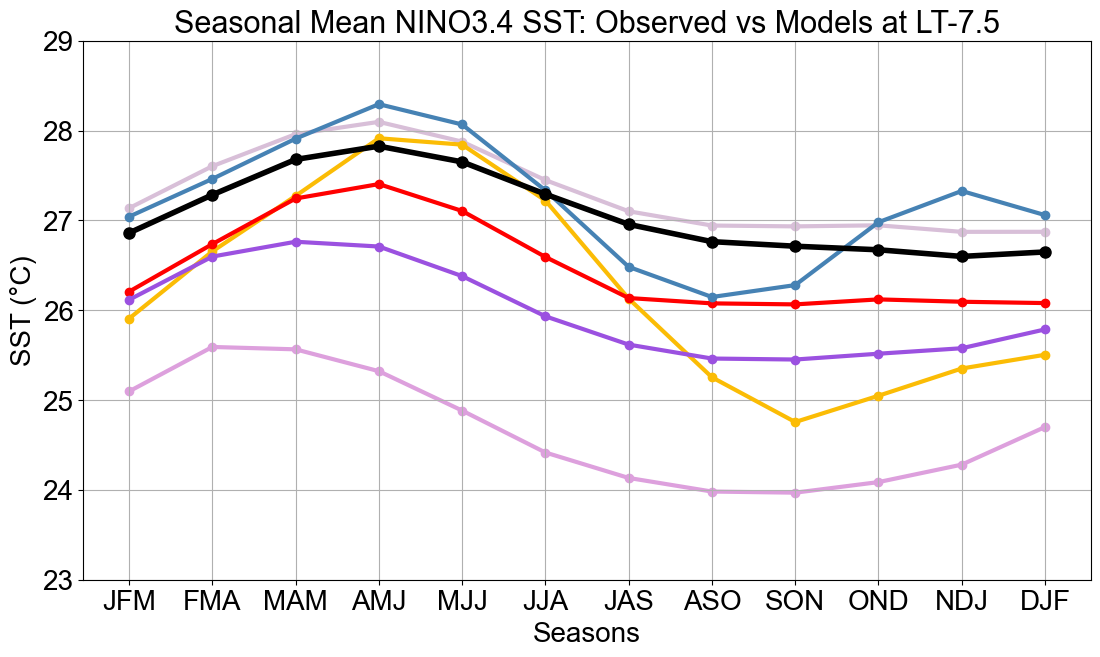

In [24]:
def multimodel_nino3_4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC4'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['MEAN_SST_GEM52_NEMO'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['MEAN_SST_CanESM5'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    #plt.legend(frameon=False)
    plt.ylim(ymin=23, ymax=29)
    plt.savefig(f'../Plots/Mean/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
    
def multimodel_nino1_2_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S_ONETWO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC4_ONETWO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['MEAN_SST_GEM52_NEMO_ONETWO'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['MEAN_SST_CanESM5_ONETWO'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=19, ymax=29)
    plt.savefig(f'../Plots/Mean/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino3_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S_THREE'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC4_THREE'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['MEAN_SST_GEM52_NEMO_THREE'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['MEAN_SST_CanESM5_THREE'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    plt.plot(obs['SZN'], obs[f'NINO3_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=23, ymax=29)
    plt.savefig(f'../Plots/Mean/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S_FOUR'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC4_FOUR'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['MEAN_SST_GEM52_NEMO_FOUR'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO', zorder=1)
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['MEAN_SST_CanESM5_FOUR'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5', zorder=1)
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    #plt.legend(frameon=False)
    plt.ylim(ymin=25, ymax=31)
    plt.savefig(f'../Plots/Mean/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()


visualizer_functions = {
    '1+2': multimodel_nino1_2_visualizer,
    '3': multimodel_nino3_visualizer,
    '3.4': multimodel_nino3_4_visualizer,
    '4': multimodel_nino4_visualizer
}

def run_visualizer(region, lead):
    if region in visualizer_functions:
        visualizer_function = visualizer_functions[region]
        visualizer_function(region, lead)
    else:
        print(f"Error: Region {region} is not recognized. Valid regions are {list(visualizer_functions.keys())}.")


#regions = ['1+2', '3', '3.4', '4']
regions = ['3.4']
leads =  [1,2,3,4,5,6,7,8]

for lead in leads:
    for region in regions:
       run_visualizer(region, lead)

#make a presentation.. for each lead time -> put the four regions in one 
#1+2 3
#3.3 3 -> arragnement of 2x2. by lead time. 
    

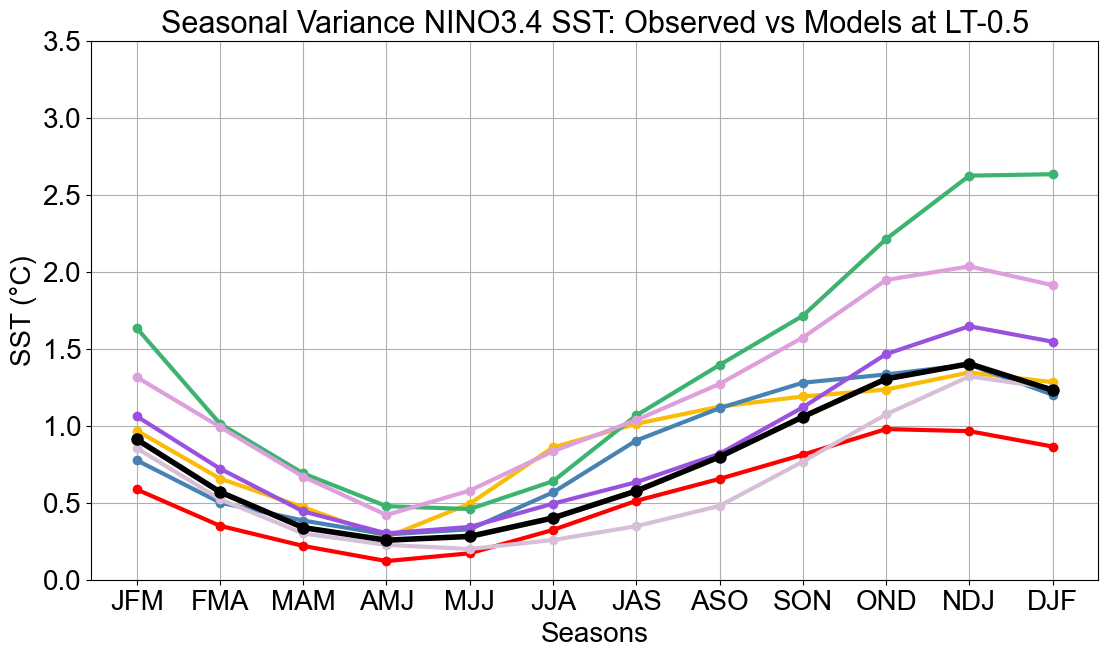

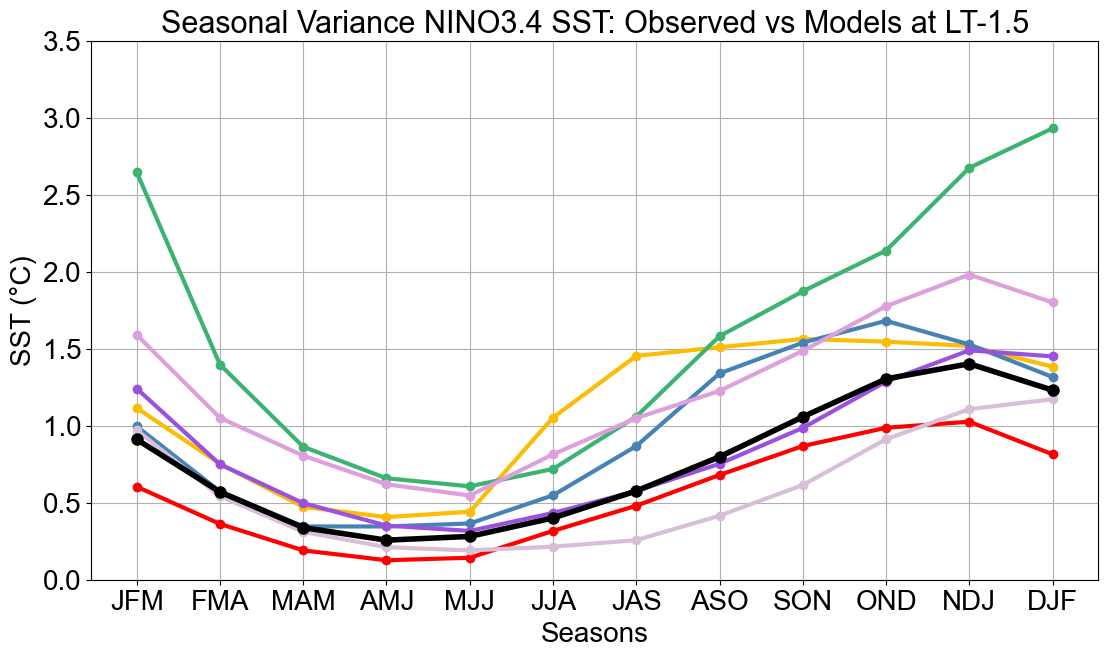

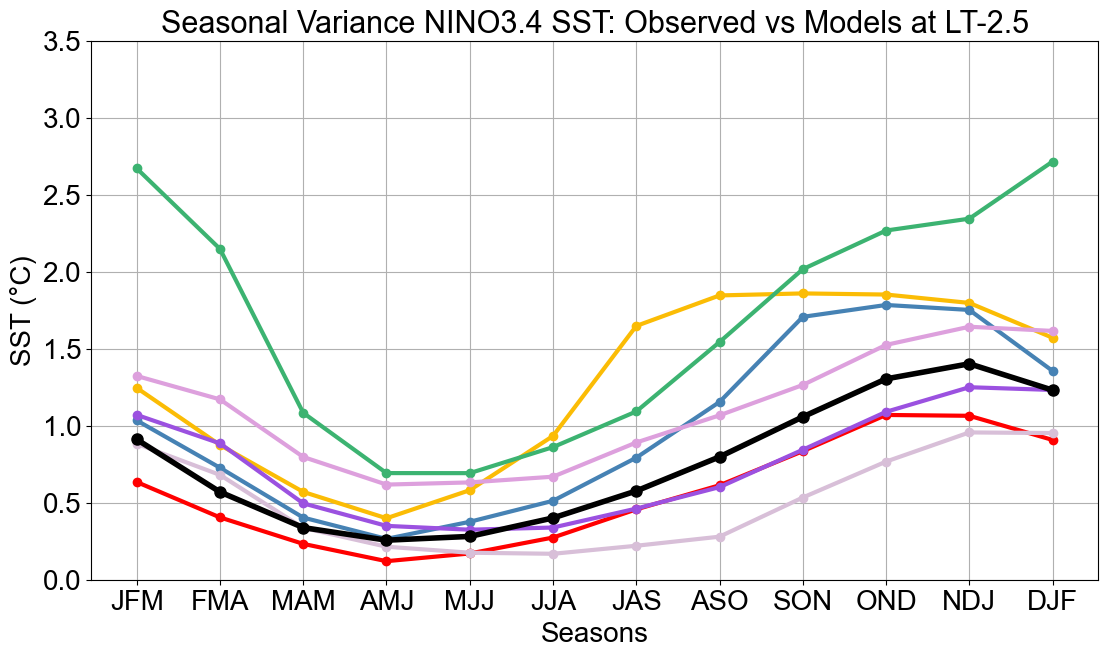

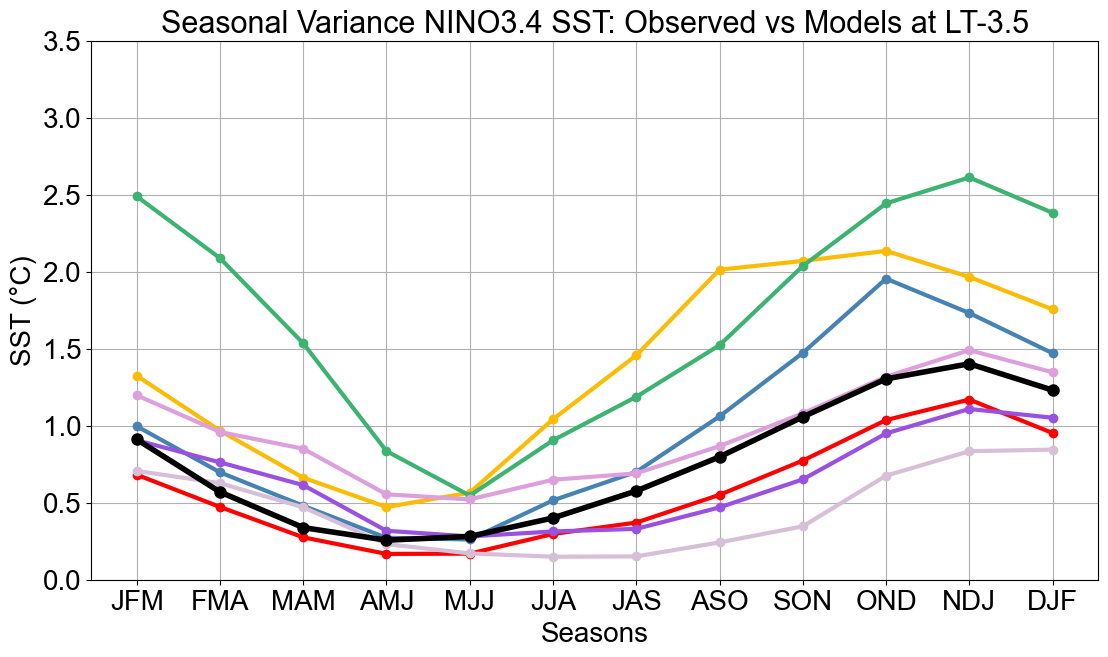

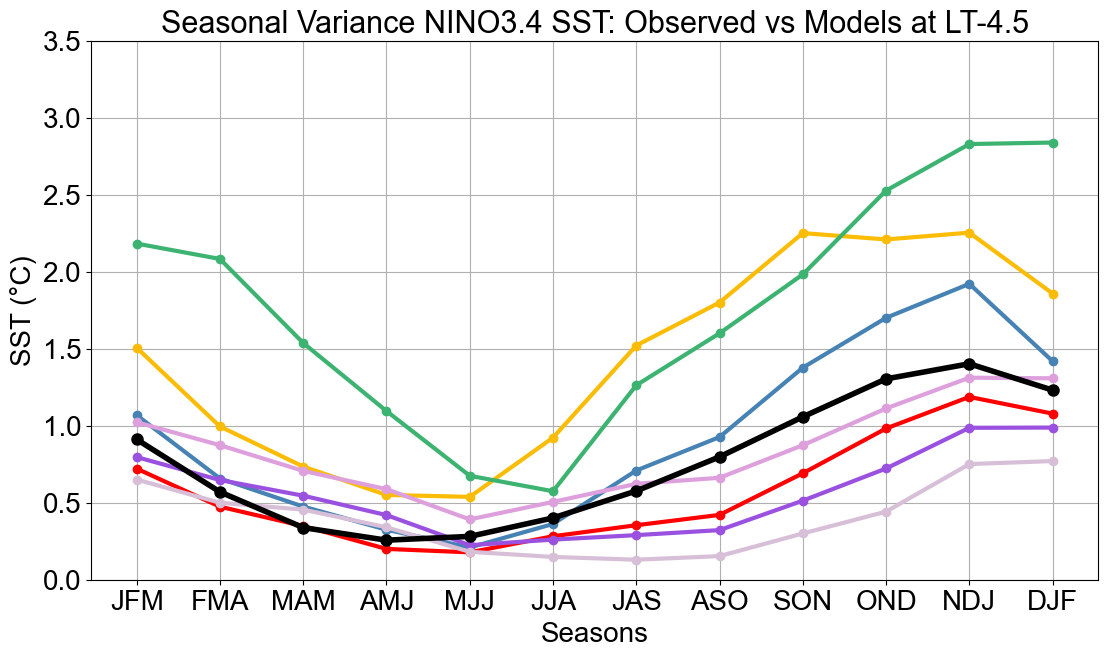

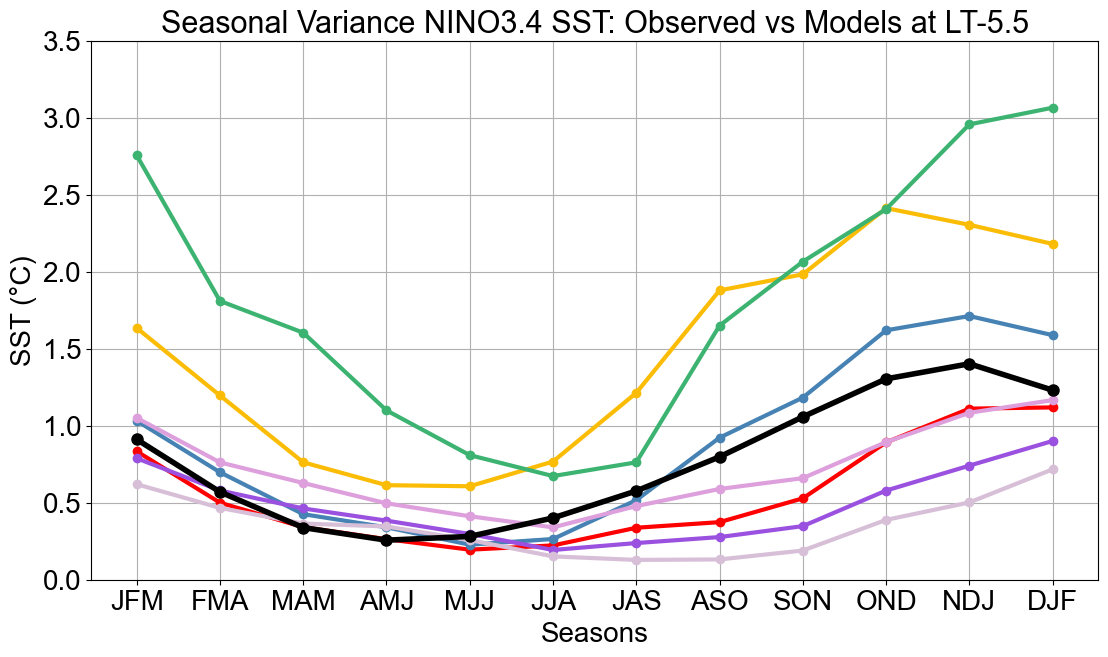

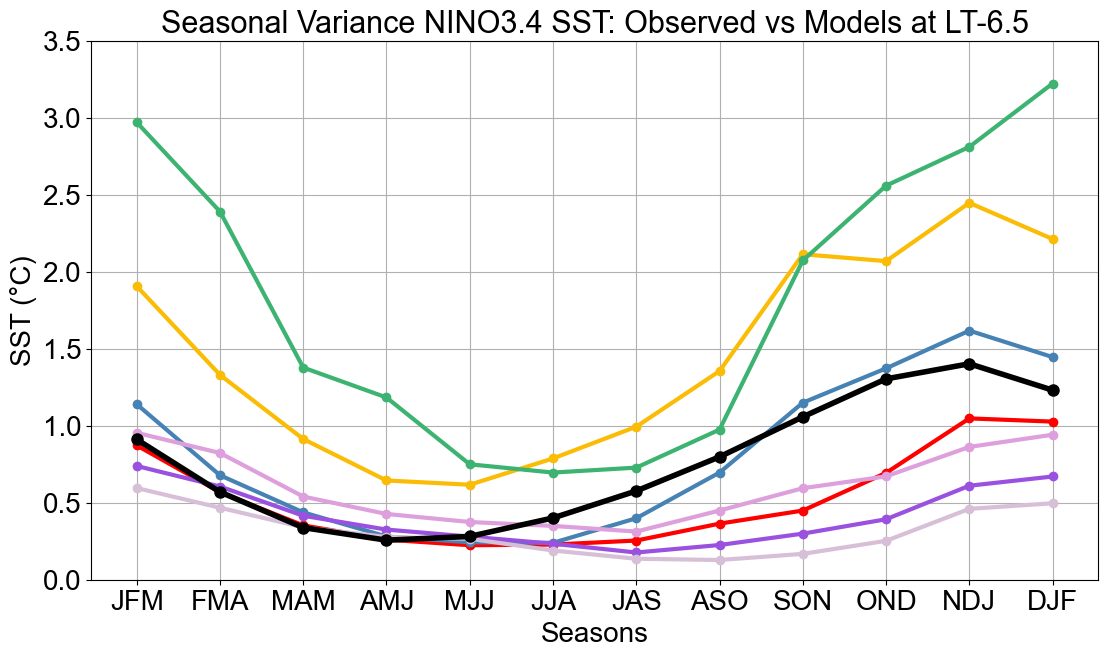

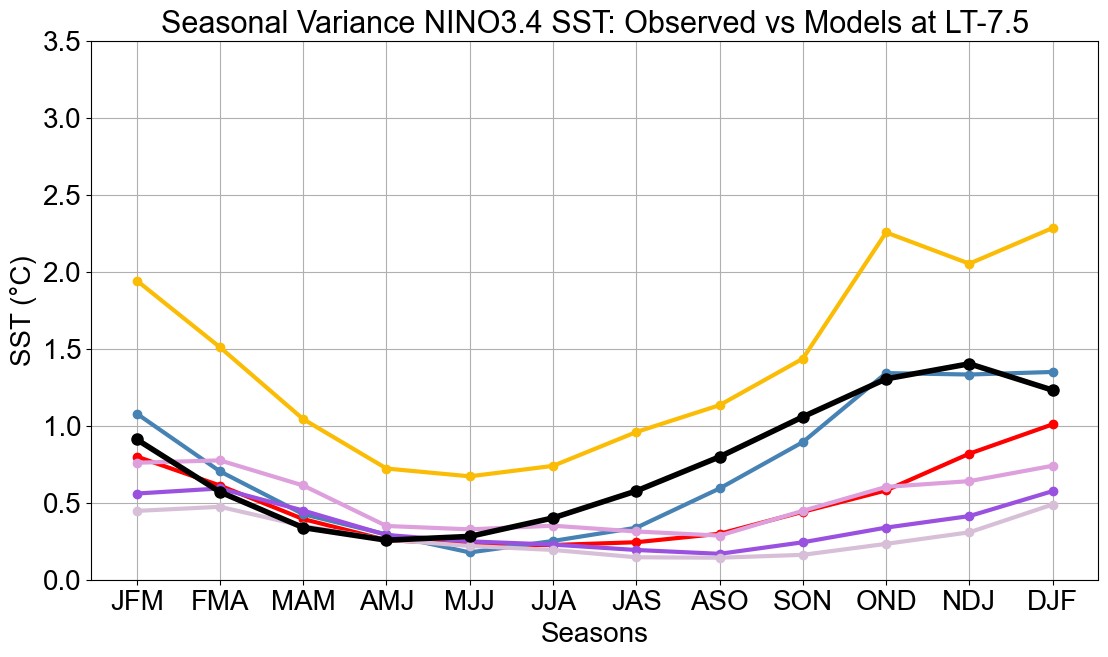

In [25]:
def multimodel_nino3_4_var_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC4'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['VAR_SST_GEM52_NEMO'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO')
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['VAR_SST_CanESM5'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5')
    plt.plot(obs['SZN'], obs[f'VARIANCE{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Variance NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    #plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=3.5)
    plt.savefig(f'../Plots/Var/seasonal_var_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
    
def multimodel_nino1_2_var_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S_ONETWO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC4_ONETWO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['VAR_SST_GEM52_NEMO_ONETWO'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO')
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['VAR_SST_CanESM5_ONETWO'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5')
    plt.plot(obs['SZN'], obs[f'VARIANCE{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Variance NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    #plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=3)
    plt.savefig(f'../Plots/Var/seasonal_var_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino3_var_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S_THREE'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC4_THREE'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['VAR_SST_GEM52_NEMO_THREE'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO')
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['VAR_SST_CanESM5_THREE'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5')
    plt.plot(obs['SZN'], obs[f'VARIANCE{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Variance NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=3.5)
    plt.savefig(f'../Plots/Var/seasonal_var_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino4_var_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S_FOUR'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC4_FOUR'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['VAR_SST_GEM52_NEMO_FOUR'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO')
    plt.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['VAR_SST_CanESM5_FOUR'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5')
    plt.plot(obs['SZN'], obs[f'VARIANCE{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Variance NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=2)
    plt.savefig(f'../Plots/Var/seasonal_var_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()


visualizer_var_functions = {
    '1+2': multimodel_nino1_2_var_visualizer,
    '3': multimodel_nino3_var_visualizer,
    '3.4': multimodel_nino3_4_var_visualizer,
    '4': multimodel_nino4_var_visualizer
}

# Higher-level function to call the appropriate visualizer function
def run_var_visualizer(region, lead):
    if region in visualizer_var_functions:
        visualizer_var_function = visualizer_var_functions[region]
        visualizer_var_function(region, lead)
    else:
        print(f"Error: Region {region} is not recognized. Valid regions are {list(visualizer_var_functions.keys())}.")


#regions = ['1+2', '3', '3.4', '4']
regions = ['3.4']
leads =  [1,2,3,4,5,6,7,8]

for lead in leads:
    for region in regions:
       run_var_visualizer(region, lead)

#make a presentation.. for each lead time -> put the four regions in one 
#1+2 3
#3.4 4 -> arragnement of 2x2. by lead time. 
    

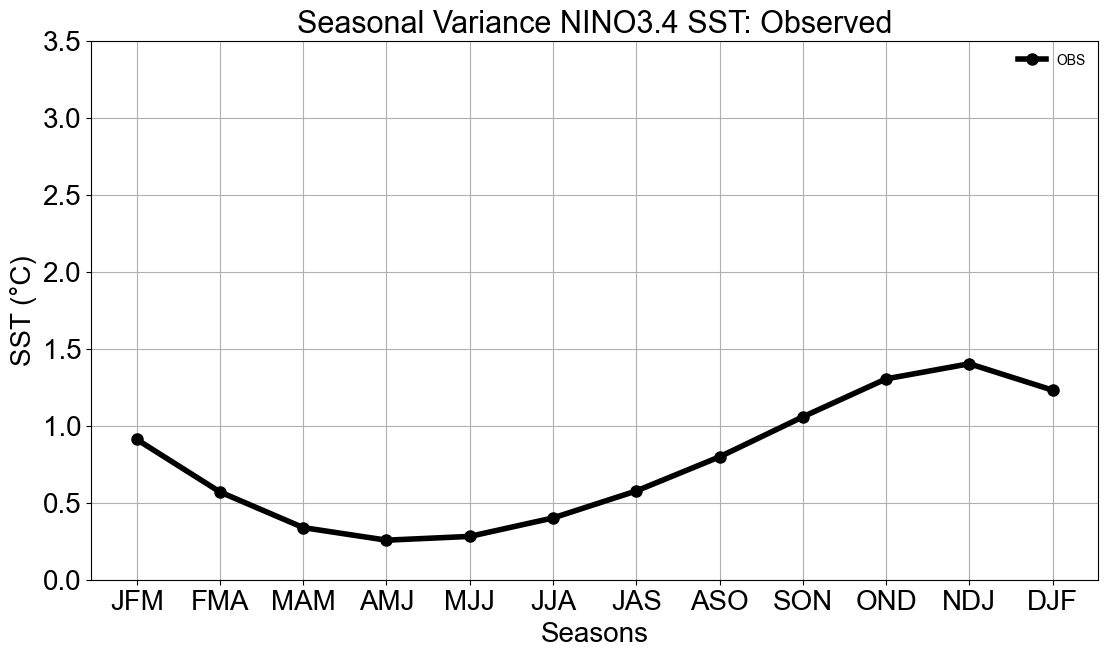

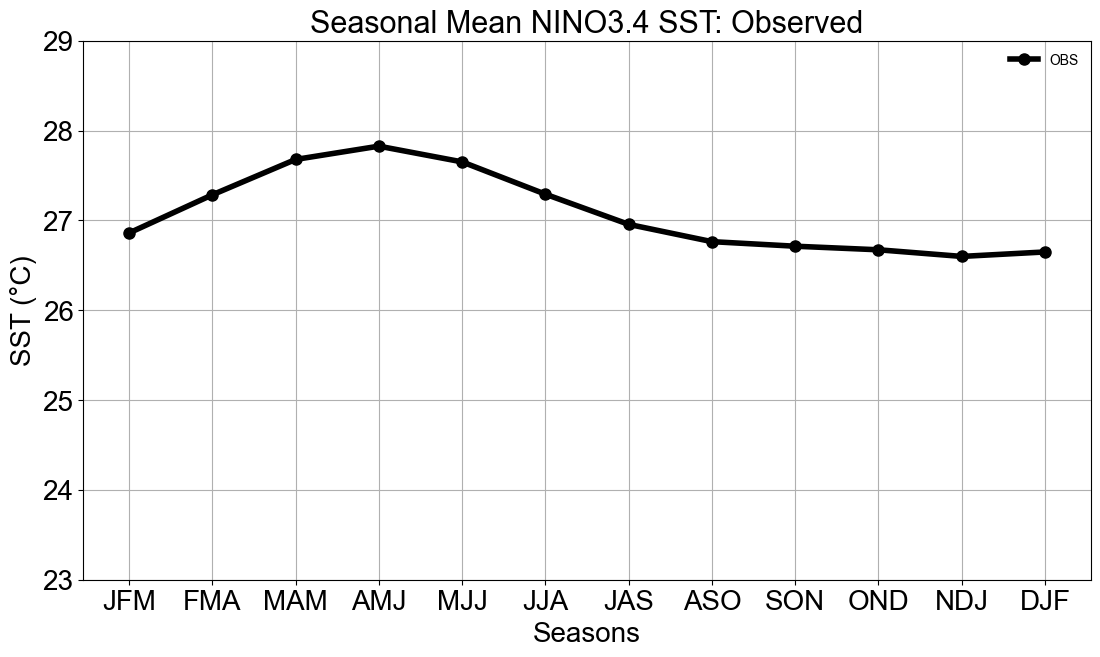

In [15]:
def obs_visualizer_var(region):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(obs['SZN'], obs[f'VARIANCE{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Variance NINO{region} SST: Observed',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=3.5)
    plt.savefig(f'../Plots/Var/seasonal_obs_var_NINO{region}.png', format='png')
    # Show the plot
    plt.show()
obs_visualizer_var('3.4')

def obs_visualizer_mean(region):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=23, ymax=29)
    plt.savefig(f'../Plots/Mean/seasonal_obs_mean_NINO{region}.png', format='png')
    # Show the plot
    plt.show()

obs_visualizer_mean('3.4')

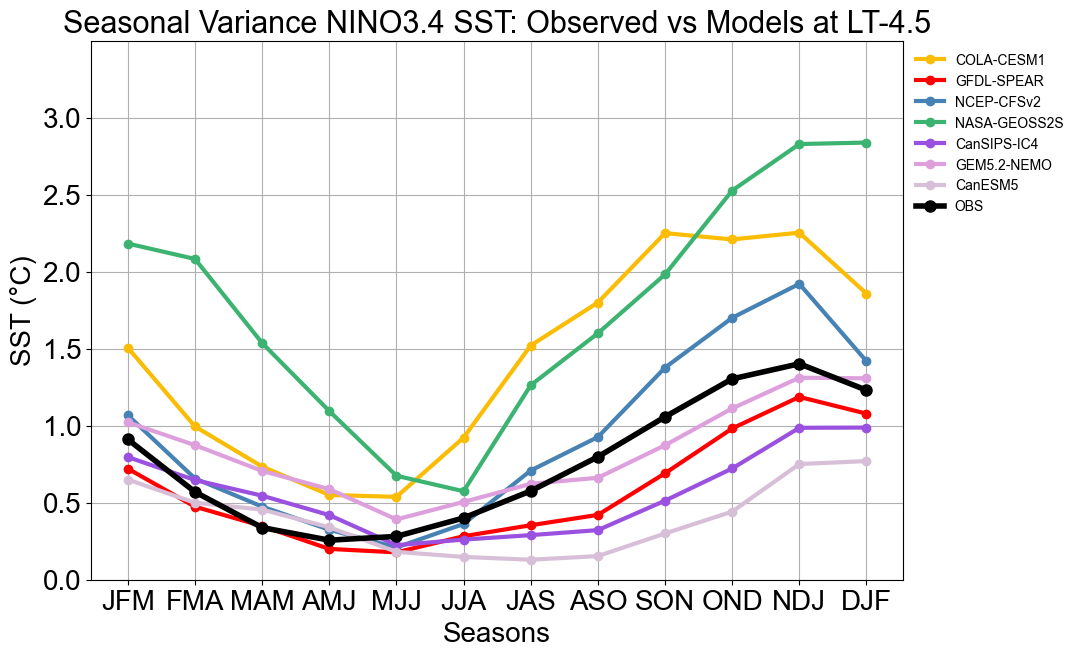

In [22]:
def multimodel_nino3_4_legend_visualizer(region, lead):
    fig, ax = plt.subplots(figsize=(13, 7))  # Moved figsize here for consistency
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    
    # Plotting the data
    ax.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05', label='COLA-CESM1')
    ax.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label='GFDL-SPEAR')
    ax.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue', label='NCEP-CFSv2')
    ax.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S'], marker='o', markersize=6, linewidth=3, linestyle='-', color='mediumseagreen', label='NASA-GEOSS2S')
    ax.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC4'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#9B51E0', label='CanSIPS-IC4')
    ax.plot(nemo_stat_dfs[f'lead{lead}']['SZN'], nemo_stat_dfs[f'lead{lead}']['VAR_SST_GEM52_NEMO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='plum', label='GEM5.2-NEMO')
    ax.plot(canesm_stat_dfs[f'lead{lead}']['SZN'], canesm_stat_dfs[f'lead{lead}']['VAR_SST_CanESM5'], marker='o', markersize=6, linewidth=3, linestyle='-', color='thistle', label='CanESM5')
    ax.plot(obs['SZN'], obs[f'VARIANCE{region}_L3'], marker='o', markersize=8, linewidth=4, linestyle='-', color='black', label='OBS')
    
    # Customize the plot
    ax.set_title(f'Seasonal Variance NINO{region} SST: Observed vs Models at LT-{lead-0.5}', size=22)
    ax.set_xlabel('Seasons', size=20)
    ax.set_ylabel('SST (°C)', size=20)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), size=20)
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ax.get_yticklabels(), size=20)
    ax.grid(True)
    ax.set_ylim(ymin=0, ymax=3.5)
    
    # Creating the legend
    legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
    
    # Adjust layout to make room for the legend
    plt.subplots_adjust(right=0.75)
    plt.savefig(f'../Plots/Mean/legend.svg', format='svg')
    # Show the plot
    plt.show()


multimodel_nino3_4_legend_visualizer('3.4', 5)